In [1]:
cd ..

/Users/flamholz/Documents/workspace/txn_factor_concs


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Distribution of TF Concentration in S. cerevisiae
Data here is measured by Mass Spec in Lu et al. Nat. Biotech 2007. Measurements appears to have lower dynamic range than ribosome profiling. I am sure there is ribosome profiling data for yeast, but it's not on the proteomaps website.
https://pubmed.ncbi.nlm.nih.gov/17187058/

In [3]:
rich_medium_df = pd.read_csv('data/proteomaps/Yeast_Lu2007/sce_Lu_rich.csv', sep='\t', skiprows=1)
minimal_medium_df = pd.read_csv('data/proteomaps/Yeast_Lu2007/sce_Lu_rich.csv', sep='\t', skiprows=1)
rich_medium_df.head()

,!ProteinIdentifier,!Abundance[original]),!Abundance[ppm],!SizeWeightedAbundance[original],!SizeWeightedAbundance[ppm],!ProteinSize,!ProteinName,!Identifiers:kegg.orthology,!Pathway
0,YHR174W,3055113.0,61102.245336,1.335084e+09,76949.703189,437.0,Eno2,K01689,Glycolysis
1,YKL060C,2044661.0,40893.210186,7.340333e+08,42307.171416,359.0,Fba1,K01624,Glycolysis
2,YGR192C,2003699.0,40073.970382,6.652281e+08,38341.473048,332.0,Tdh3,K00134,Glycolysis
3,YCR012W,1898620.0,37972.390887,7.898259e+08,45522.867405,416.0,Pgk1,K00927,Glycolysis
4,YGR254W,1842521.0,36850.411156,8.051817e+08,46407.920944,437.0,Eno1,K01689,Glycolysis


In [4]:
mask = np.logical_and(rich_medium_df['!Pathway'] == 'Transcription factors',
                      rich_medium_df['!Abundance[ppm]'] > 0)
rich_tf_df = rich_medium_df[mask]

mask = np.logical_and(minimal_medium_df['!Pathway'] == 'Transcription factors',
                      minimal_medium_df['!Abundance[ppm]'] > 0)
minimal_tf_df = minimal_medium_df[mask]
minimal_tf_df.head()

,!ProteinIdentifier,!Abundance[original]),!Abundance[ppm],!SizeWeightedAbundance[original],!SizeWeightedAbundance[ppm],!ProteinSize,!ProteinName,!Identifiers:kegg.orthology,!Pathway
340,YLR182W,7548.0,150.959964,6061044.0,349.337867,803.0,Swi6,K06648,Transcription factors
352,YNL216W,6892.0,137.839967,5699684.0,328.510311,827.0,Rap1,K09426,Transcription factors
436,YEL009C,4615.0,92.299978,1296815.0,74.743986,281.0,Gcn4,K09464,Transcription factors
439,YKL179C,4591.0,91.819978,3117289.0,179.669887,679.0,Coy1,K09313,Transcription factors
475,YDL106C,3959.0,79.179981,2213081.0,127.554427,559.0,Pho2,K02646,Transcription factors


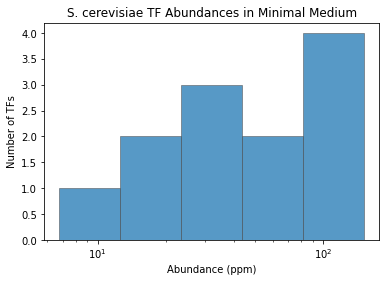

In [5]:
plt.figure()
sns.histplot(
    minimal_tf_df,
    x="!Abundance[ppm]", 
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
plt.xlabel('Abundance (ppm)')
plt.ylabel('Number of TFs')
plt.title('S. cerevisiae TF Abundances in Minimal Medium')

plt.show()

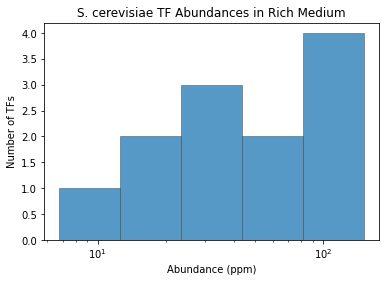

In [6]:
plt.figure()
sns.histplot(
    rich_tf_df,
    x="!Abundance[ppm]", 
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
plt.xlabel('Abundance (ppm)')
plt.ylabel('Number of TFs')
plt.title('S. cerevisiae TF Abundances in Rich Medium')

plt.show()

# Trying a second data set
Using mass spec data from Nagaraj et al. Mol. Cell. Proteomics 2012 to check if newer methods have greater dynamic range, which indeed they appear to. Above there was roughly 1 O.M. dynamic range in both rich and minimal medium, but in the more recent paper the dynamic range of measurements is increased to 4 O.M.

In [7]:
rich_medium_df = pd.read_csv('data/proteomaps/Yeast_Nagaraj2012/sce_Nagaraj.csv', sep='\t', skiprows=1)
mask = np.logical_and(rich_medium_df['!Pathway'] == 'Transcription factors',
                      rich_medium_df['!Abundance[ppm]'] > 0)
rich_tf_df = rich_medium_df[mask]

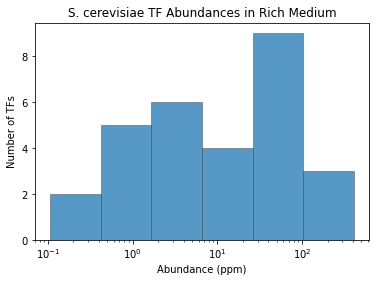

In [8]:
plt.figure()
sns.histplot(
    rich_tf_df,
    x="!Abundance[ppm]", 
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
plt.xlabel('Abundance (ppm)')
plt.ylabel('Number of TFs')
plt.title('S. cerevisiae TF Abundances in Rich Medium')

plt.show()